# Reported Crimes in Boston #
Let's take a look at reported crime incident reports in Boston from the city's [Open Data portal](https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system). We'll organize our data and create an interface that will allow users to search for crimes by entering an address and their desired search radius.

  This file is available in the repository in csv form.  
  
[Step 1: Checking out Our Data](#Step-1:-Checking-out-Our-Data)  
[Step 2: Importing Libraries](#Step-2:-Importing-Libraries)  
[Step 3: Organizing our data](#Step-3:-Organizing-our-data)  
[Step 4: User Input and Calculations](#Step-4:-User-Input-and-Calculations)  
[Step 5: Making a Map](#Step-5:-Making-a-Map)    

Try launching on [mybinder.org](https://mybinder.org/)!


### Exercise Notes:¶  ###
**For each technique, we will**:  
- present an explanation which will include an example of the syntax. 
- work through an example
- allow you to practice a similar example on your own  

## Step 1: Checking out Our Data ##  
Before we start writing anything, let's open up the file we have to see what we're working with. Ultimately, we'll want to make sure that we have coordinates for plotting and some information for each item. 
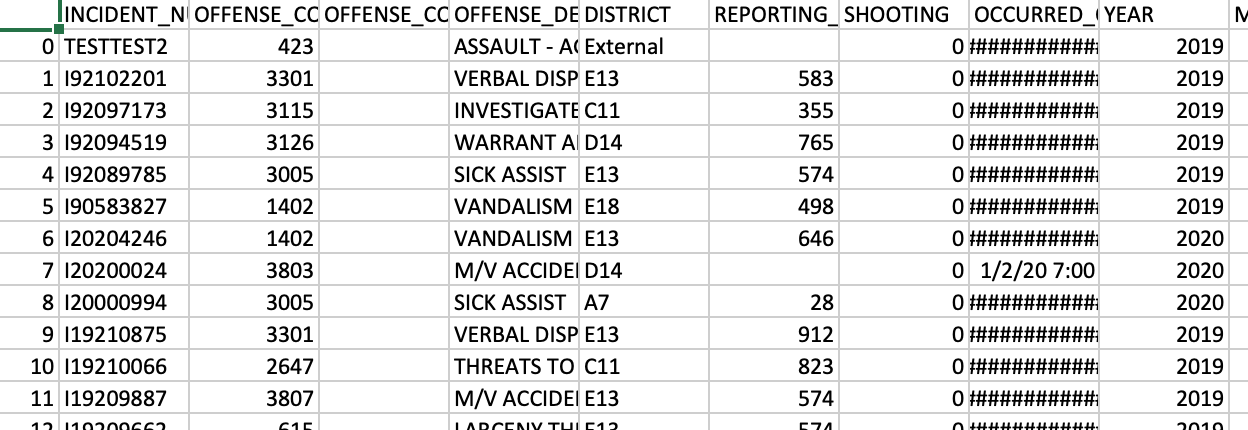  


## Step 2: Importing Libraries ##
This is typically done in the first lines of a script. This way, you won't waste time running parts of your script before finding that a library was not available.  

In this workshop we'll be using:  
- [pandas](https://pandas.pydata.org/pandas-docs/stable/) for data handling and manipulation
- [folium](https://python-visualization.github.io/folium/) for data vizualization with leaflet maps
- [geopy](https://github.com/geopy/geopy) for converting addresses to coordinates and performing operations on our coordinate pairs  

Most items below start with 'from' because we only want specific functions from their different modules.

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from folium.vector_layers import Circle
from geopy.geocoders import Nominatim 
from geopy.extra.rate_limiter import RateLimiter #optional for our purposes
from geopy.distance import geodesic

## Step 3: Organizing our data ##

Now that we've finished our imports, let's collect the data we want into a pandas dataframe and clean it up a little.  

We can use the following function to read our csv:  
df = pd.read_csv('*file_path*', usecols=['*example header*',...,'*final*'])  

For example if we wanted just the year column, we could do:

In [ ]:
#Example
just_the_year = pd.read_csv('data/crimes.csv', usecols = ['YEAR']) #<- Example 
print(just_the_year)

Now try reading reading the following columns into one dataframe: OFFENSE_DESCRIPTION, YEAR, MONTH, DAY_OF_WEEK, STREET, Lat, Long, and Location

In [ ]:
crimes1 = pd.read_csv('data/crimes1.csv',usecols=['OFFENSE_DESCRIPTION', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'STREET', 'Lat', 'Long', 'Location'])
crimes2 = pd.read_csv('data/crimes2.csv',usecols=['OFFENSE_DESCRIPTION', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'STREET', 'Lat', 'Long', 'Location'])
crimes3 = 
crimes4 = 
#print(crimes)

crimes = pd.concat([crimes1,crimes2,crimes3,crimes4])

Now that we have our data in a variable, let's take care of some loose ends:  
1. All rows have a value for longitude, but some are missing a value for latitude. Both can be found in the location column, but not all rows have a value for location.
2. Some of the rows that are missing Lat have a Location value of (0,0).  

We won't be able to do anything about the data with values of (0 , 0), so we'll have to drop those rows eventually. For now let's limit our data to one year. That can be done with the method below:  

df = df[df.YEAR != 2019]


In [ ]:
#Example
just_the_year = just_the_year[just_the_year.YEAR != 2019]
print(just_the_year)

In [ ]:
crimes = 

Let's use the Location column to fill in the missing Lat values! This can be done a number of ways, but let's try incorporating the following methods:  

df.fillna(*Val*,inplace=True)

In [ ]:
#Example
import numpy as np
df = pd.DataFrame({'a':[0,np.nan,3], 'b':[np.nan,2.3,3.4], 'c':[[1,9],[2,4],[3,7]]})
print('df:\n',df)

#Replace NaN in a corresponding values from c
df['a'].fillna(df['c'],inplace=True)
print('df:\n',df)

#Then replace Nan in b with value from a
df['b'].fillna(df['a'],inplace=True)
print('df:\n',df)

In [ ]:
crimes['Lat'].fillna(crimes['Location'],inplace=True)
print(crimes['Lat'])

Almost done. Use the following method to replace this tuple with just the value for latitude:    

df['*column*'] = df['*column*'].apply(lambda x: x *+ 1*)  

This uses the apply method to apply a function to the entire column. The function we're applying is a lambda function where (above) we say for every x, make x = x + 1

In [ ]:
#Example
print('Before:\n',df)
df['c'] = df['c'].apply(lambda x: x[0] if isinstance(x,list) else x)
print('After:\n',df)

In [ ]:
print(type(crimes['Location'][0])) #Form of a tuple but it's a string!!
crimes['Lat'] = crimes['Lat'].apply(lambda x: x if isinstance(x,float) else float(x.split('(')[1].split(',')[0])) #makes this line a little complicated 
print(crimes['Lat'])

Finally, drop the rows where the value for Latitude is 0 and pick a year of data (2019?)  

df = df[df['*column*']] != 0

In [ ]:
#Example
df = df[df['a'] != 0]
print(df)

In [ ]:
crimes = 
print(crimes)

## Step 4: User Input and Calculations##  

We want to be able to search the area around a certain address, so let's ask the user for an input.   

var = input('Enter input')

In [ ]:
#Example
resp = input('Enter your name\n')
print('Hi,', resp)

In [ ]:
user_address = 
radius = 

Below is an example of how to use geopy to get the location of an address. Try making a geolocator variable and be sure to make your own app name.  

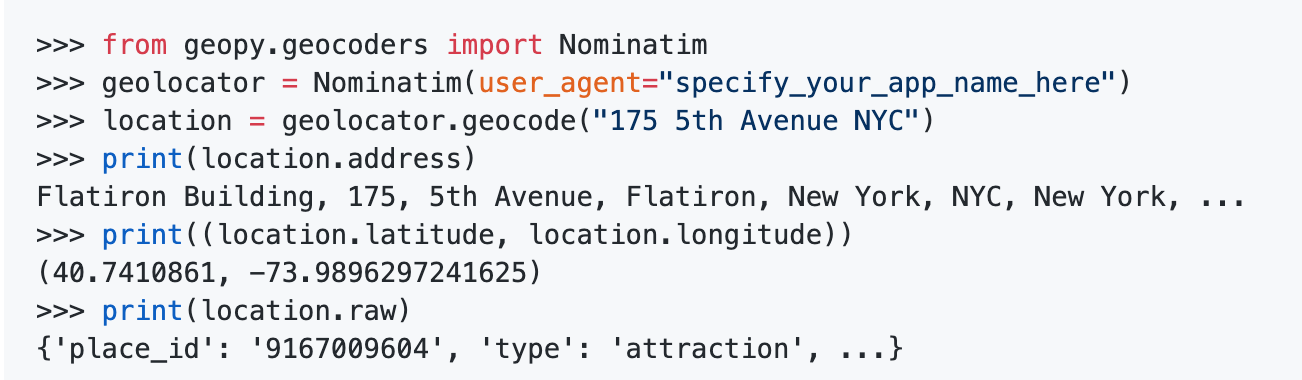

In [ ]:
geolocator = 
location = 
print(location.latitude, location.longitude)

Here, we will compare each item in our dataframe to the location the geocoder gave us and see if it is less than the user's radius.  

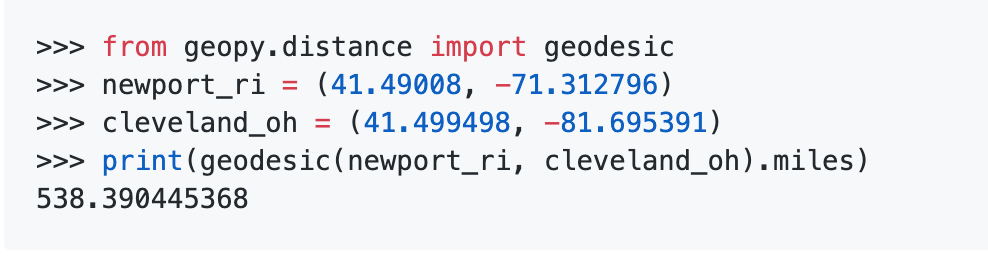  

Combine this function with the following method to make a list of points to plot:  

for index, row in df.iterrows():  
    row['column'] = 

In [ ]:
#Example
ls = []
for index, row in df.iterrows():
    ls.append(row['a'])
print(ls)

In [ ]:
to_plot = []
for index, row in crimes.iterrows():
    if geodesic().meters <= float(radius):
        to_plot.append(row)

## Step 5: Making a Map ##

Below is the code for generating a map with folium. You can see that location takes a pair of coordinates. Run the cell to see what the map looks like. Then try changing it to center on the user-generated address

In [ ]:
map = folium.Map(location=[30, 20], default_zoom_start = 13)
map

Here's the documentation to make a circle on the map. Try adding one at the user's point!
  
  
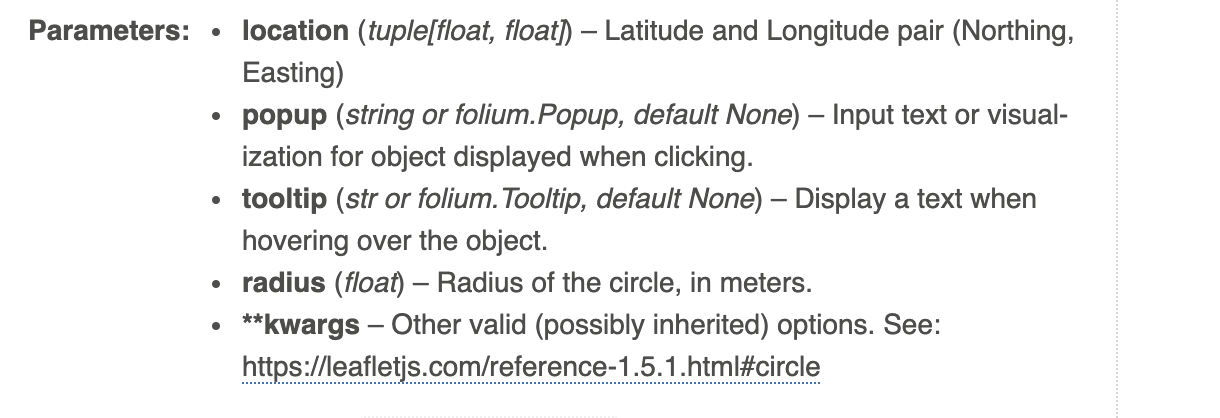

In [ ]:
#Circle().add_to(map)

In [ ]:
marker_cluster = MarkerCluster().add_to(map)

In the cell above, there's an object that clusters our markers together. Add each marker to the marker cluster then display the map!  

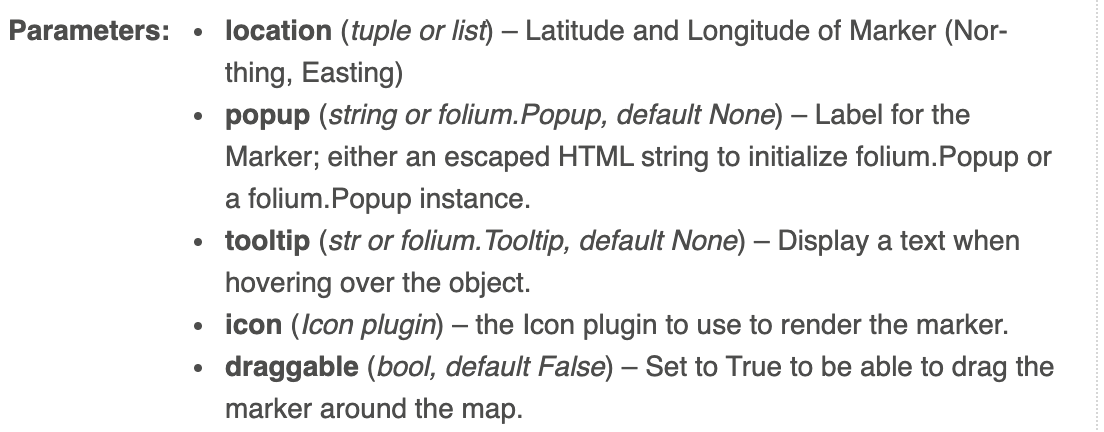

In [ ]:
"""for item in to_plot:
    popup = 
    location = 
    folium.Marker(
        location = location,
        popup=popup
    ).add_to(marker_cluster)"""

In [ ]:
map